(180, 279, 3)


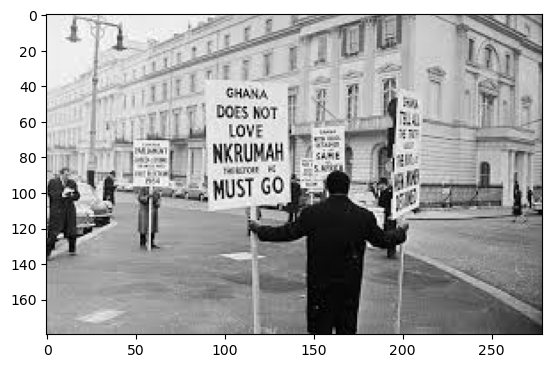

In [1]:
from skimage import io
import matplotlib.pyplot as plt
io.use_plugin('matplotlib', 'imread')

img = io.imread('./images/download.jpg')
print(img.shape)
plt.imshow(img)
plt.show()
%matplotlib inline



In [2]:
import cv2

img_cv2 = cv2.imread('./images/download.jpg')
gray_image = cv2.imread('./images/download.jpg', cv2.IMREAD_GRAYSCALE) 
gray_0 = cv2.imread('./images/download.jpg', 0)
img_opencv = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)


In [3]:
import pandas as pd
df = pd.DataFrame(img.flatten())
df.head()

,0
0,236
1,236
2,236
3,236
4,236


In [4]:
filepath = 'nice.xlsx'
df.to_excel(filepath,index=False)

In [5]:
# RGB to HSV

from skimage import color
from skimage import data
from pylab import *

# convert to HSV
img_hsv = color.rgb2hsv(img)
img_hsv

array([[[0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        ...,
        [0.        , 0.        , 0.58823529],
        [0.        , 0.        , 0.53333333],
        [0.        , 0.        , 0.49019608]],

       [[0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        ...,
        [0.        , 0.        , 0.53333333],
        [0.        , 0.        , 0.54509804],
        [0.        , 0.        , 0.53333333]],

       [[0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        [0.        , 0.        , 0.9254902 ],
        ...,
        [0.        , 0.        , 0.57647059],
        [0.        , 0.        , 0.48627451],
        [0.        , 0.        , 0.4627451 ]],

       ...,

       [[0.        , 0.        , 0.61176471],
        [0.        , 0.        , 0.63529412],
        [0.        , 0

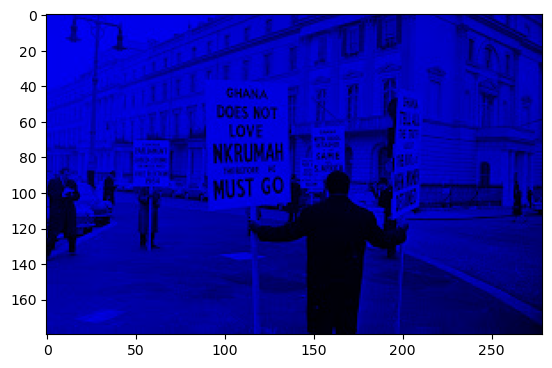

In [6]:
plt.imshow(img_hsv)

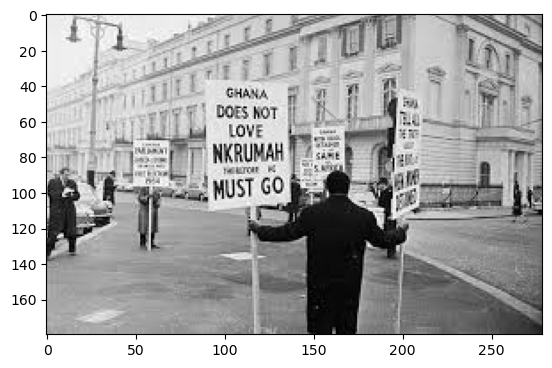

In [7]:
img_rgb = color.hsv2rgb(img_hsv)
plt.imshow(img_rgb)

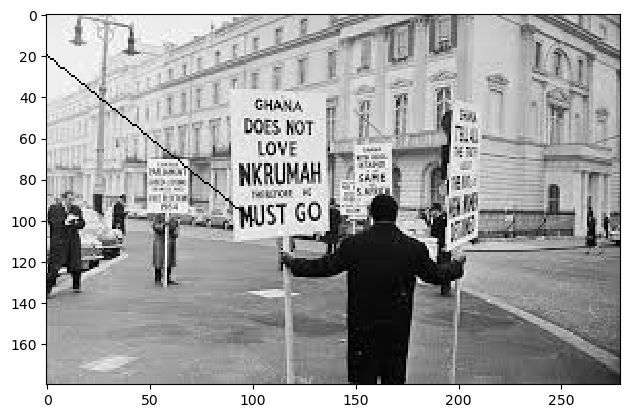

In [8]:
from skimage import draw
import numpy as np

x, y = draw.line(20, 0, 100, 100)
img_cpy = np.copy(img)
img_cpy[x, y] = 0
io.imshow(img_cpy)

# Doing Gamma Correction
Gamma corrction ensures that images are displayed correctly on the screen.


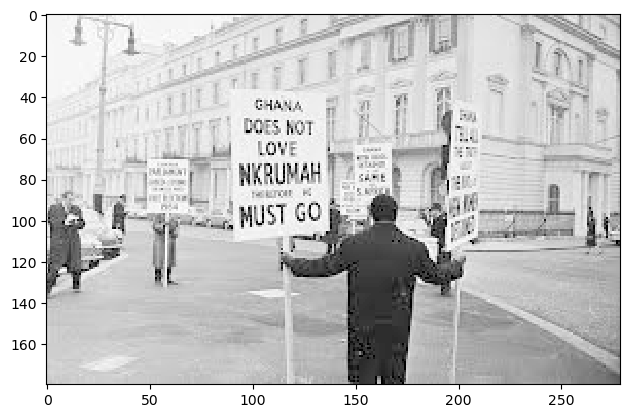

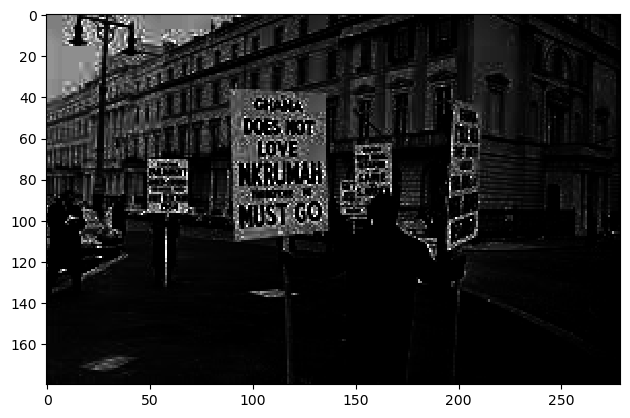

In [9]:
from matplotlib.pyplot import figure
from skimage import exposure

gamma_corrected1 = exposure.adjust_gamma(img, .5)
gamma_corrected2 = exposure.adjust_gamma(img, 9)

figure(0)
io.imshow(gamma_corrected1)
figure(1)
io.imshow(gamma_corrected2)

## Determining Structural Similarity
It is used to find the index that indicate how much two images are similar.

In [10]:
from skimage import metrics as ssim

ssim_original = ssim.structural_similarity(img, img, data_range=img.max() - img.min(), multichannel=True)
ssim_modified = ssim.structural_similarity(img, img_hsv, data_range=img.max() - img_hsv.min(), multichannel=True)

print(ssim_original, ssim_modified)


1.0 0.0021061834940328534


/tmp/ipykernel_40935/3766947646.py:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_original = ssim.structural_similarity(img, img, data_range=img.max() - img.min(), multichannel=True)
/tmp/ipykernel_40935/3766947646.py:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_modified = ssim.structural_similarity(img, img_hsv, data_range=img.max() - img_hsv.min(), multichannel=True)


# OpenCV

In [11]:
import cv2
from skimage import io

# img1 = cv2.imread('./images/download.jpg')
# img2 = cv2.imread('./images/download2.jpg')

# alpha = 0.6
# beta = 1.0 - alpha

# if img1.shape != img2.shape:
#     print("Images are not of the same size and channels")
# else:
#     final_image = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

#     cv2.imshow("final image", final_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

## Changing contrast and brightness

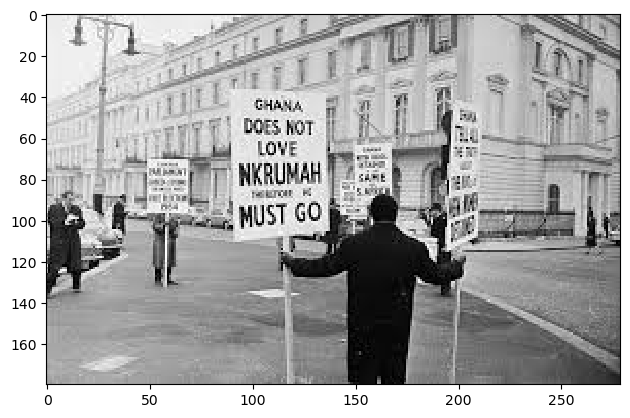

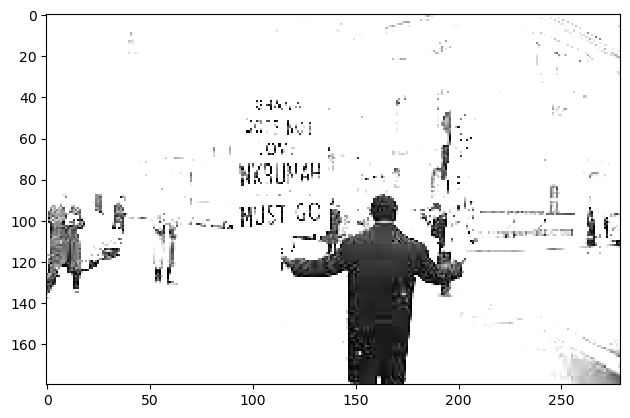

In [12]:
import cv2 
import numpy as np
from matplotlib.pyplot import figure
from skimage import io

img =cv2.imread('./images/download.jpg')

new_image = np.zeros(img.shape, img.dtype)

contrast = 3.0
bright = 2

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y, x, c] = np.clip(contrast*img[y,x,c] + bright, 0, 255)

figure(0)
io.imshow(img)
figure(1)
io.imshow(new_image)

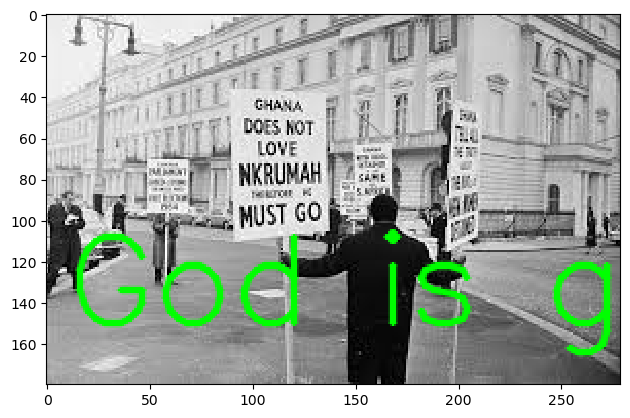

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 'God is great', (10, 150), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
io.imshow(img)